In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from guitar_chord_data_handler import GuitarChordDataHandler
from model_builder import ModelBuilder

from datetime import datetime

from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras import ops
import matplotlib.pyplot as plt
import numpy as np
DATASET_TRAIN_PATH = "train_chords_data.h5"
DATASET_TEST_PATH = "test_chords_data.h5"
train_data = GuitarChordDataHandler(DATASET_TRAIN_PATH)
test_data = GuitarChordDataHandler(DATASET_TEST_PATH)

input_train, target_train = train_data._get_inputs_and_targets()
input_test, target_test = test_data._get_inputs_and_targets() # For Test and Validation Set

# Split the test set into validation and test sets
# validation_test_split
inputs_validation, inputs_test, targets_validation, targets_test = train_test_split(
    input_test, target_test, test_size=0.5  # 50% of input_test goes to test, 50% to validation
)
print(input_train.shape)
print(inputs_validation.shape)
print(input_test.shape)

(4157, 72, 1025)
(463, 72, 1025)
(927, 72, 1025)


In [2]:
input_train = input_train[..., np.newaxis]
inputs_validation = inputs_validation[..., np.newaxis]
input_test = input_test[..., np.newaxis]
print(input_train.shape)
print(inputs_validation.shape)
print(input_test.shape)

(4157, 72, 1025, 1)
(463, 72, 1025, 1)
(927, 72, 1025, 1)


In [3]:
layer_config = [
    {'type': 'conv', 'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu'},
    {'type': 'maxpool', 'pool_size': (3, 3), 'strides' : (2, 2), 'padding' : 'same'},
    {'type': 'batch_normalization'}, # Normalize the activation? Speed Ups Training Converging Way Faster, Mode Reliable

    {'type': 'conv', 'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu'},
    {'type': 'maxpool', 'pool_size': (3, 3), 'strides' : (2, 2), 'padding' : 'same'},
    {'type': 'batch_normalization'}, # Normalize the activation? Speed Ups Training Converging Way Faster, Mode Reliable
    
    {'type': 'conv', 'filters': 32, 'kernel_size': (2, 2), 'activation': 'relu'},
    {'type': 'maxpool', 'pool_size': (2, 2), 'strides' : (2, 2), 'padding' : 'same'},
    {'type': 'batch_normalization'}, # Normalize the activation? Speed Ups Training Converging Way Faster, Mode Reliable
    
    
    {'type': 'flatten'},
    {'type': 'dense', 'units': 64, 'activation': 'relu'},
    {'type': 'dropout', 'rate': 0.3}
]
input_shape = input_train.shape[1], input_train.shape[2], input_train.shape[3]
num_classification = 8
model_builder = ModelBuilder(input_shape, num_classification, layers=layer_config)
model = model_builder._build_model(learning_rate=0.0001)
# Train
history = model.fit(input_train, target_train, validation_data=(inputs_validation, targets_validation), batch_size=32, epochs=50)
# Evaluate
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print("Accuracy on Test Set: ", test_accuracy)
print("Error on Test Set: ", test_error)
print("--" * 50)
print("Finish time:", datetime.now().strftime("%d/%m/%Y %H:%M"))

Start time: 10/01/2025 22:21
Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 56s 408ms/step - loss: 2.1220 - sparse_categorical_accuracy: 0.2966 - val_loss: 1.0562 - val_sparse_categorical_accuracy: 0.7538
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 49s 380ms/step - loss: 0.6373 - sparse_categorical_accuracy: 0.7791 - val_loss: 0.5212 - val_sparse_categorical_accuracy: 0.8683
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 50s 381ms/step - loss: 0.3048 - sparse_categorical_accuracy: 0.8945 - val_loss: 0.4322 - val_sparse_categorical_accuracy: 0.8898
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 50s 385ms/step - loss: 0.2165 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.3091 - val_sparse_categorical_accuracy: 0.9136
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 49s 379ms/step - loss: 0.1501 - sparse_categorical_accuracy: 0.9504 - val_loss: 0.3052 - val_sparse_categorical_accuracy: 0.9050
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 53s 410ms/step - loss: 0.1346 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.3495

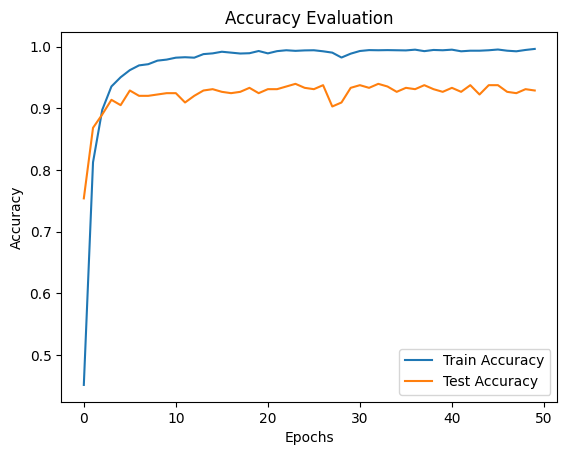

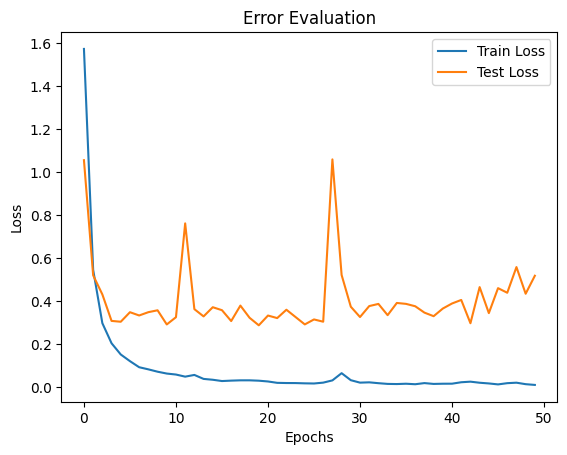

In [7]:
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.title('Accuracy Evaluation')
plt.show()
        
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.title('Error Evaluation')
plt.show()

In [5]:
model.save("Guitar_Chord_Classification_Model.keras")